In [27]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from skimage import data, io, filters
from skimage.feature import match_template

%matplotlib inline 

(18, 10, 3) (18, 10, 3)


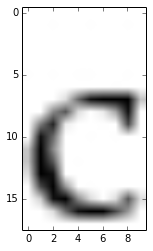

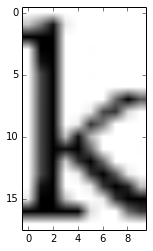

In [28]:
c = np.asarray(Image.open("Images/Q1/c.jpg"),dtype=np.float64)/255.0
k = np.asarray(Image.open("Images/Q1/k.jpg"),dtype=np.float64)/255.0
# three = np.asarray(Image.open("Images/Q2/Working set/I3.jpg"),dtype=np.float64)/255.0

print c.shape , k.shape #, three.shape


f=plt.figure()
# f.set_size_inches(18.5, 10.5)

plt.imshow(c)
plt.figure()
plt.imshow(k)
# plt.figure()
# plt.imshow(three)
# plt.figure()

In [29]:
# Font images:
ariel = np.asarray(Image.open("Images/Q1/Fonts/Ariel.jpg"),dtype=np.float64)/255.0
calibari = np.asarray(Image.open("Images/Q1/Fonts/Calibari.jpg"),dtype=np.float64)/255.0
plantinoLino = np.asarray(Image.open("Images/Q1/Fonts/PlatinoLinotype.jpg"),dtype=np.float64)/255.0
timesNewRoman = np.asarray(Image.open("Images/Q1/Fonts/TimesNewRoman.jpg"),dtype=np.float64)/255.0
verdana = np.asarray(Image.open("Images/Q1/Fonts/Verdana.jpg"),dtype=np.float64)/255.0

In [51]:
def template_extractor(image):
    '''Takes an np image array'''
    x,y, z = image.shape
    template = image[x/2:x, y/2:y]
    return template

temp_c = template_extractor(c)
temp_k = template_extractor(k)

result = match_template(c, temp_c)
ij = np.unravel_index(np.argmax(result), result.shape)
# x, y = ij[::-1]

# plt.imshow(c)
# rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')

print result
# print ij

[[[-0.09538822]
  [ 0.00480504]
  [ 0.17361024]
  [ 0.39131084]
  [ 0.53120756]
  [ 0.67010009]]

 [[ 0.16396578]
  [ 0.37201419]
  [ 0.48326051]
  [ 0.38094276]
  [ 0.15510651]
  [ 0.25651246]]

 [[ 0.3895492 ]
  [ 0.29706636]
  [ 0.13125682]
  [-0.08735796]
  [-0.0907028 ]
  [ 0.07283822]]

 [[ 0.23782122]
  [ 0.22165491]
  [ 0.01686892]
  [-0.16373689]
  [-0.16495171]
  [-0.05424648]]

 [[ 0.18978256]
  [ 0.15329976]
  [-0.05248157]
  [-0.16915189]
  [-0.19090927]
  [-0.18041663]]

 [[ 0.15514092]
  [ 0.13951501]
  [-0.02721717]
  [-0.16834615]
  [-0.19056253]
  [-0.17995013]]

 [[ 0.12260476]
  [ 0.14292417]
  [ 0.01188379]
  [-0.17995481]
  [-0.18883543]
  [-0.17856827]]

 [[ 0.03749436]
  [ 0.18072049]
  [ 0.22092719]
  [ 0.09808408]
  [-0.04152462]
  [-0.01907783]]

 [[ 0.07906819]
  [ 0.09437581]
  [ 0.24735808]
  [ 0.22271764]
  [ 0.0171758 ]
  [ 0.14049947]]

 [[-0.08685698]
  [-0.05690456]
  [ 0.1924352 ]
  [ 0.58000946]
  [ 0.71561348]
  [ 1.00000024]]]


In [43]:
def SSD(temp1, temp2):  
    match1 = np.sum((temp_c[:,:,0:3]-c[:,:,0:3])**2)
    


ValueError: operands could not be broadcast together with shapes (9,5,3) (18,10,3) 

In [ ]:
image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(coin)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()